In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np
import pandas as pd


In [26]:
# create a dictionary to hold all the companies and their android ids
companies = {
    "AAD_1": ["B004NWLM8K", "B004Q1NH4U", "B004LPBTAA"],
    "AAD_2": ["B004S6NAOU", "B004R6HTWU", "B004N8KDNY"], 
    "AAD_3": ["B004KA0RBS", "B004NPELDA", "B004L26XXQ"],
}


# create a dictionary to hold all the review texts of all the 3 android apps for each company
company_data_review = { "AAD_1": [], "AAD_2": [], "AAD_3": [], }

# create a dictionary to hold all the review outcome (positive, negative, neutral) of all the 3 android apps for each company
company_data_label = { "AAD_1": [], "AAD_2": [], "AAD_3": [], }

#  load csv file for train data

def load_Csv(filename):
    # create a list variable to store all the reviews
    reviews = []
    # create a list variable to store all the labels
    labels = []
    # open the file given
    
    file = open(filename, 'r')
    # read each line from file
    lines = file.readlines()
    
    # loop through lines
    for line in lines:
        # split line based on tab
        splitLine = line.split('\t')
        # append the review text which is at index 2 into the reviews list
        reviews.append(splitLine[2])
        # append the label text which is at index 0 into the labels list
        labels.append(splitLine[0])

    # return list of reviews and labels as a tuple
    return reviews, labels
    
train_Review, train_Labels = load_Csv('C:/Users/iykeg/OneDrive/Desktop/APPLICATION OF BIG DATA/CW2/Traind.csv')
count_vect = CountVectorizer(max_features=10000)

#Text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer

Train_counts = count_vect.fit_transform(train_Review)
training_words = count_vect.get_feature_names()

count_vect_test = CountVectorizer( vocabulary=training_words)

test_Review, test_Labels = load_Csv('C:/Users/iykeg/OneDrive/Desktop/APPLICATION OF BIG DATA/CW2/Testd.csv')

#defining the support vector machine classifier

classifier = svm.SVC(kernel = 'rbf')

Test_counts = count_vect_test.fit_transform(test_Review)

#Training the SVM

classifier.fit(Train_counts, train_Labels)

reviewed_table = {}

#Performance evaluation by displaying the precision, recall, F1-score and support for each
#class.
#get predictions

predicted = classifier.predict(Test_counts)
confusion = metrics.classification_report(test_Labels, predicted)

print("Classification report for Support Vector Machine")

#summarizing it in table form

print(confusion)
np.mean(predicted == test_Labels)


Classification report for Support Vector Machine
              precision    recall  f1-score   support

           1       0.72      0.45      0.55      3469
           2       0.60      0.04      0.08      2087
           3       0.80      0.98      0.88     14443

    accuracy                           0.79     19999
   macro avg       0.71      0.49      0.50     19999
weighted avg       0.76      0.79      0.74     19999



0.7890394519725986

In [5]:
classifier = KNeighborsClassifier(n_neighbors=8)

Test_counts = count_vect_test.fit_transform(test_Review)

classifier.fit(Train_counts, train_Labels)

reviewed_table = {}

predicted = classifier.predict(Test_counts)
confusion = metrics.classification_report(test_Labels, predicted)
print("Classification report for K-Neighbors")
print(confusion)
np.mean(predicted == test_Labels)

Classification report for K-Neighbors
              precision    recall  f1-score   support

           1       0.51      0.16      0.24      3469
           2       0.24      0.06      0.09      2087
           3       0.75      0.96      0.84     14443

    accuracy                           0.73     19999
   macro avg       0.50      0.39      0.39     19999
weighted avg       0.65      0.73      0.66     19999



0.7251362568128407

In [84]:
classifier = tree.DecisionTreeClassifier()

Test_counts = count_vect_test.fit_transform(test_Review)

classifier.fit(Train_counts, train_Labels)

reviewed_table = {}

predicted = classifier.predict(Test_counts)
confusion = metrics.classification_report(test_Labels, predicted)
print("Classification report for Decision Tree")
print(confusion)
np.mean(predicted == test_Labels)

Classification report for Decision Tree
              precision    recall  f1-score   support

           1       0.46      0.39      0.42      3469
           2       0.22      0.20      0.21      2087
           3       0.81      0.85      0.83     14443

    accuracy                           0.71     19999
   macro avg       0.50      0.48      0.49     19999
weighted avg       0.69      0.71      0.70     19999



0.7050352517625881

In [41]:
classifier = RandomForestClassifier(n_estimators = 40)

Test_counts = count_vect_test.fit_transform(test_Review)

classifier.fit(Train_counts, train_Labels)

reviewed_table = {}

predicted = classifier.predict(Test_counts)
confusion = metrics.classification_report(test_Labels, predicted)
print("Classification report for Random Forest")
print(confusion)
np.mean(predicted == test_Labels)

Classification report for Random Forest
              precision    recall  f1-score   support

           1       0.80      0.23      0.36      3469
           2       0.53      0.02      0.04      2087
           3       0.76      0.99      0.86     14443

    accuracy                           0.76     19999
   macro avg       0.70      0.42      0.42     19999
weighted avg       0.74      0.76      0.69     19999



0.75978798939947

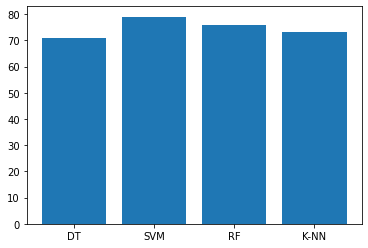

In [43]:
x = np.arange(4)
plt.bar(x, height=[71,79,76,73])
plt.xticks(x, ['DT','SVM','RF','K-NN']);

In [ ]:
#I USED SUPPORT VECTOR MACHINE SINCE IT GAVE ME A HIGHER PREDICTION FROM OTHER MACHINE LEARNING IMPLEMENTED

In [16]:
companies = {
    "AAD_1": ["B004NWLM8K", "B004Q1NH4U", "B004LPBTAA"],
    "AAD_2": ["B004S6NAOU", "B004R6HTWU", "B004N8KDNY"], 
    "AAD_3": ["B004KA0RBS", "B004NPELDA", "B004L26XXQ"],
}


# create a dictionary to hold all the review texts of all the 3 android apps for each company
company_data_review = { "AAD_1": [], "AAD_2": [], "AAD_3": [], }

# create a dictionary to hold all the review outcome (positive, negative, neutral) of all the 3 android apps for each company
company_data_label = { "AAD_1": [], "AAD_2": [], "AAD_3": [], }


def loadtest_Csv(input_file):
   
    # open the file given
    file = open(input_file, 'r')
    # read each line from file
    lines = file.readlines()
    
    # loop through lines
    for line in lines:
        # split line based on tab
        splitLine = line.split('\t')
    
            # get the company's android app code at index 1
        id = splitLine[1]
            # loop through each company
        for company in companies:
                # retrieve a company only if the id exists in the company dictionary defined above
                # i.e we are only taking companies specified in this coursework
            if id in companies[company]:
                    # append the review text which is at index 2 into the company_data_review list of retrieved company
                company_data_review[company].append(splitLine[2])
                    # append the label text which is at index 2 into the company_data_label list of retrieved company
                company_data_label[company].append(splitLine[0])
                
                
train_Review, train_Labels = load_Csv('C:/Users/iykeg/OneDrive/Desktop/APPLICATION OF BIG DATA/CW2/Traind.csv')
count_vect = CountVectorizer(max_features=10000)

#Text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer

Train_counts = count_vect.fit_transform(train_Review)
training_words = count_vect.get_feature_names()

count_vect_test = CountVectorizer(vocabulary=training_words)

loadtest_Csv('C:/Users/iykeg/OneDrive/Desktop/APPLICATION OF BIG DATA/CW2/Testd.csv')

classifier = svm.SVC()

classifier.fit(Train_counts, train_Labels)

reviewed_table = {}

for test_review in company_data_review:
    new_counts = count_vect_test.fit_transform(company_data_review[test_review])
    predicted = classifier.predict(new_counts)
    Positive = [lbl for lbl in predicted if lbl == '3']
    Neutral = [lbl for lbl in predicted if lbl == '2']
    Negative = [lbl for lbl in predicted if lbl == '1']
    reviewed_table[test_review] = [len(predicted), len(Positive), len(Neutral), len(Negative), len(Positive)/len(predicted), len(Neutral)/len(predicted), len(Negative)/len(predicted)]


    
table = pd.DataFrame.from_dict(reviewed_table)
table.index = ['Total', 'Positive', 'Neutral', 'Negative', 'Postive Ratio', 'Neutral Ratio', 'Negative Ratio']
print("Support Vector Machine")
table

Support Vector Machine


,AAD_1,AAD_2,AAD_3
Total,107.000000,296.000000,168.000000
Positive,106.000000,232.000000,117.000000
Neutral,0.000000,5.000000,0.000000
Negative,1.000000,59.000000,51.000000
Postive Ratio,0.990654,0.783784,0.696429
Neutral Ratio,0.000000,0.016892,0.000000
Negative Ratio,0.009346,0.199324,0.303571


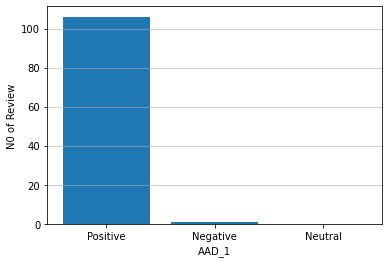

In [59]:
plt.grid( axis='y', alpha=0.75)
plt.xlabel('AAD_1')
plt.ylabel('N0 of Review')
plt.title('')
x = np.arange(3)
plt.bar(x, height=[106,1,0])
plt.xticks(x, ['Positive','Negative','Neutral']);


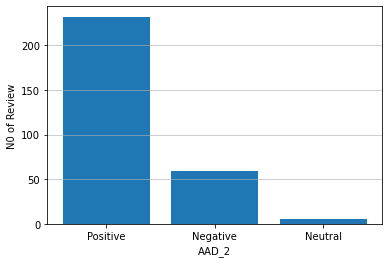

In [61]:
plt.grid( axis='y', alpha=0.75)
plt.xlabel('AAD_2')
plt.ylabel('N0 of Review')
x = np.arange(3)
plt.bar(x, height=[232,59,5])
plt.xticks(x, ['Positive','Negative','Neutral']);

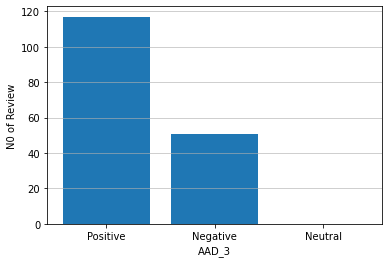

In [62]:
plt.grid( axis='y', alpha=0.75)
plt.xlabel('AAD_3')
plt.ylabel('N0 of Review')
plt.title('')
x = np.arange(3)
plt.bar(x, height=[117,51,0])
plt.xticks(x, ['Positive','Negative','Neutral']);